# Traffic Fatalities

* **Data:** `traffic-fatalities.csv`
* **Description:** NYC Pedestrian Fatalities (Bicycle-Pedestrian and Motor Vehicle-Pedestrian Crashes)
* **Source:** https://www1.nyc.gov/html/dot/downloads/pdf/nycdot-pedestrian-fatalities-by-bike-motor-vehicle.pdf
* **Columns of interest:**
    * `Year` is the year of the measurements
    * `Struck_by_Bicycle` is the number of people killed after being hit by a bicycle
    * `Struck_by_Motor_Vehicle` is the number of people killed after being hit by a motor vehicle (car, bus, etc)

In [10]:
import pandas as pd 
import numpy as np

## Read in the data

In [11]:
df = pd.read_csv("traffic-fatalities.csv", encoding="utf-8")

In [12]:
df.shape

(15, 3)

In [13]:
df.dtypes

Year                       int64
Struck_by_Bicycle          int64
Struck_by_Motor_Vehicle    int64
dtype: object

In [14]:
df.head(15)

,Year,Struck_by_Bicycle,Struck_by_Motor_Vehicle
0,2006,0,168
1,2007,0,140
2,2008,1,153
3,2009,2,156
4,2010,0,153
5,2011,0,143
6,2012,0,151
7,2013,1,183
8,2014,3,137
9,2015,0,139


## How many years of data do we have?

Provide the first and last year.

In [15]:
df.head(1)

,Year,Struck_by_Bicycle,Struck_by_Motor_Vehicle
0,2006,0,168


In [16]:
df.tail(1)

,Year,Struck_by_Bicycle,Struck_by_Motor_Vehicle
14,2020,0,99


## Total number of people killed by being struck by motor vehicles

In [17]:
df.Struck_by_Motor_Vehicle.sum()

2116

## Create a new column for each year that is total deaths

In [18]:
df['total_deaths'] = (df['Struck_by_Motor_Vehicle'] + df['Struck_by_Bicycle'])
df.insert(1, "total_deaths", df['total_deaths'])

ValueError: cannot insert total_deaths, already exists

In [19]:
df.head(5)

,Year,Struck_by_Bicycle,Struck_by_Motor_Vehicle,total_deaths
0,2006,0,168,168
1,2007,0,140,140
2,2008,1,153,154
3,2009,2,156,158
4,2010,0,153,153


In [20]:
# df.Struck_by_Motor_Vehicle + df.Struck_by_Bicycle  

In [21]:
# df['inches'] = (df['length'] / (2.54))
# df.insert(1, "inches", df['inches'])

## Create a new column that is percent of deaths caused by bicycles

In [23]:
df['percent_of_bicycle_deaths'] = (df['Struck_by_Bicycle'] / df['total_deaths'])
df.insert(1, "percent_of_bicycle_deaths", df['percent_of_bicycle_deaths'])

ValueError: cannot insert percent_of_bicycle_deaths, already exists

In [24]:
df.head(5)

,Year,Struck_by_Bicycle,Struck_by_Motor_Vehicle,total_deaths,percent_of_bicycle_deaths
0,2006,0,168,168,0.000000
1,2007,0,140,140,0.000000
2,2008,1,153,154,0.006494
3,2009,2,156,158,0.012658
4,2010,0,153,153,0.000000


In [25]:
# del df['percent_of_deaths']

In [26]:
# df.head(5)

## What year had the highest percentage of deaths caused by bicycles?

In [33]:
df.sort_values(by = 'percent_of_bicycle_deaths', ascending=False).head(1)

,Year,Struck_by_Bicycle,Struck_by_Motor_Vehicle,total_deaths,percent_of_bicycle_deaths
8,2014,3,137,140,0.021429


## Complete the following sentence, using the year from the last question

`In the year ____, ____% of pedestrian deaths were caused by bicycles.` Just type it in a comment, no need to use f-strings or anything. 

In [ ]:
# In the year 2014, 2.1% of pedestrian deaths were caused by bicycles.

## Plot the total number of traffic fatalities over time

Make sure the y axis starts at zero.

In [41]:
import matplotlib.pyplot as plt

(0.0, 188.25)

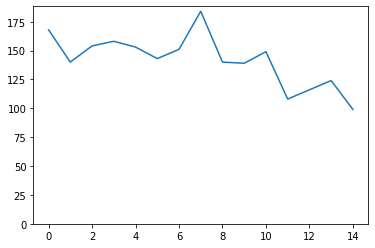

In [49]:
df.total_deaths.plot().set_ylim(0)

## What year had the largest percent drop in traffic fatalities?

You calculate percentage change on a column using using `.pct_change()`.

In [70]:
# Way 1: applying pct_change to all variables sorting by total deaths change
df.pct_change().sort_values(by = 'total_deaths', ascending=True).head(1)

,Year,Struck_by_Bicycle,Struck_by_Motor_Vehicle,total_deaths,percent_of_bicycle_deaths,total_percent_change
11,0.000496,inf,-0.281879,-0.275168,inf,-4.824832


In [62]:
# way 2: creating new column for pct change and sorting
df['total_percent_change'] = df.total_deaths.pct_change()
df.insert(1, "total_percent_change", df['total_percent_change'])

ValueError: cannot insert total_percent_change, already exists

In [73]:
df.sort_values(by = 'total_percent_change', ascending=True).head(1)

,Year,Struck_by_Bicycle,Struck_by_Motor_Vehicle,total_deaths,percent_of_bicycle_deaths,total_percent_change
11,2017,1,107,108,0.009259,-0.275168


## Complete the following sentence, using the year from the last question

`Compared to the previous year, in____ there was a ____% drop in traffic fatalities.` Just type it in a comment, no need to use f-strings or anything. 

In [ ]:
# Compared to the previous year, in 2017 there was a 27.5% drop in traffic fatalities.